In [145]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

X, y = make_regression(random_state=0, n_samples=1000, n_features=100)

Text(0, 0.5, 'samples')

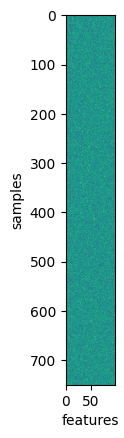

In [146]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
len(train_X), len(val_X), len(train_y), len(val_y)

fig, ax = plt.subplots()
ax.imshow(train_X)
ax.set_xlabel("features")
ax.set_ylabel("samples")


Best number of estimators: 1802


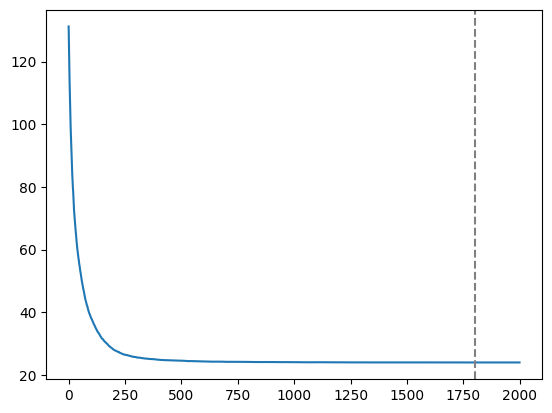

In [157]:
# GradientBoostingRegressor with staged_predict for estimating of best number of trees
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=2000)
gbrt.fit(train_X, train_y)

errors = [ mean_absolute_error(val_y, y_prediction) for y_prediction in gbrt.staged_predict(val_X)]
bst_n_estimators = np.argmin(errors) + 1

print(f"Best number of estimators: {bst_n_estimators}")
plt.plot(errors)
plt.axvline(x=bst_n_estimators, color="grey", linestyle="--")
plt.show()

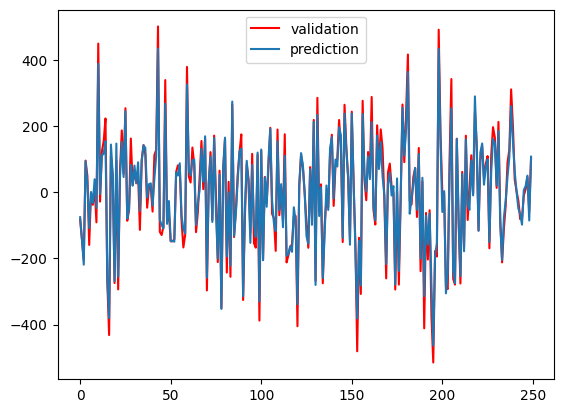

In [153]:
# now create model with best number of estimators (trees)
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(train_X, train_y)

y_prediction = gbrt_best.predict(val_X)

fig, ax = plt.subplots(1)

x = np.arange(250)
ax.plot(x, val_y, color='red', label='validation',linewidth=1)
ax.plot(x, y_prediction,  label='prediction',linewidth=7.0)
ax.legend()